In [1]:
from pandas import read_csv
import numpy as np
from preprocessing import PreProcesing
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
import tensorflow as tf
from tensorflow.keras.models import load_model,Sequential
from tensorflow.keras.layers import Dense,Embedding,GRU,TimeDistributed,LSTM
from tensorflow.keras.backend import clear_session
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
import matplotlib.pyplot as plt
import seaborn as sns

df = read_csv("./Dataset/intents.csv")
x = df["SENTENCE"].fillna("fillna").values
y = df["TAG"].fillna("fillna").values
z = df["NER"].fillna("fillna").values

tokenizer=PreProcesing()
tokenizer.prepare_preprocessing(x,y,z)
x_vector=tokenizer.encode_and_pad(x)
y_vector=tokenizer.tag_to_bag(y)
X_training, X_validation, y_training, y_validation = train_test_split(x_vector, y_vector, test_size = 0.3, shuffle = True,stratify=y_vector, random_state = 1)
X_test, X_val, y_test, y_val = train_test_split(X_validation, y_validation, test_size = 0.5, shuffle = True, stratify = y_validation, random_state = 1)

In [15]:
#GRU Training
gru = Sequential()
gru.add(Embedding(tokenizer.lemmatized_word_number, 30, input_length = 20)) 
gru.add(GRU(units=30,return_sequences=False, dropout=0.5, recurrent_dropout=0.5))
gru.add(Dense(tokenizer.number_intent_tags, activation="softmax"))
clear_session()
adam = Adam(learning_rate=0.004)

filename = 'Models/gru_classification.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(filename, monitor='val_loss', verbose=1, 
                             save_best_only=True, mode='min')

gru.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
gru_history  = gru.fit(X_training,y_training, epochs =30, batch_size=8, verbose=1, validation_data=(X_val, y_val),
callbacks=[checkpoint])

Epoch 1/30
301/304 [============================>.] - ETA: 0s - loss: 3.3861 - accuracy: 0.0640
Epoch 1: val_loss improved from inf to 3.34816, saving model to Models\gru_classification.h5
304/304 [==============================] - 5s 12ms/step - loss: 3.3859 - accuracy: 0.0647 - val_loss: 3.3482 - val_accuracy: 0.0672
Epoch 2/30
301/304 [============================>.] - ETA: 0s - loss: 3.1915 - accuracy: 0.0760
Epoch 2: val_loss improved from 3.34816 to 2.80033, saving model to Models\gru_classification.h5
304/304 [==============================] - 3s 11ms/step - loss: 3.1907 - accuracy: 0.0758 - val_loss: 2.8003 - val_accuracy: 0.0902
Epoch 3/30
301/304 [============================>.] - ETA: 0s - loss: 2.7801 - accuracy: 0.0922
Epoch 3: val_loss improved from 2.80033 to 2.68189, saving model to Models\gru_classification.h5
304/304 [==============================] - 4s 13ms/step - loss: 2.7807 - accuracy: 0.0915 - val_loss: 2.6819 - val_accuracy: 0.1228
Epoch 4/30
300/304 [=========

In [8]:
#LSTM Training
lstm = Sequential()
lstm.add(Embedding(tokenizer.lemmatized_word_number, 30, input_length = 20)) 
lstm.add(LSTM(units=30,return_sequences=False, dropout=0.5, recurrent_dropout=0.5))
lstm.add(Dense(tokenizer.number_intent_tags, activation="softmax"))
clear_session()
adam = Adam(learning_rate=0.004)

filename = 'Models/lstm_classification.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(filename, monitor='val_loss', verbose=1, 
                             save_best_only=True, mode='min')

lstm.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
lstm_history  = lstm.fit(X_training,y_training, epochs =30, batch_size=8, verbose=1, validation_data=(X_val, y_val),
callbacks=[checkpoint])

Epoch 1/30
301/304 [============================>.] - ETA: 0s - loss: 3.0744 - accuracy: 0.0785
Epoch 1: val_loss improved from inf to 2.67766, saving model to Models\lstm_classification.h5
304/304 [==============================] - 6s 13ms/step - loss: 3.0730 - accuracy: 0.0787 - val_loss: 2.6777 - val_accuracy: 0.1152
Epoch 2/30
302/304 [============================>.] - ETA: 0s - loss: 2.4659 - accuracy: 0.1784
Epoch 2: val_loss improved from 2.67766 to 2.09414, saving model to Models\lstm_classification.h5
304/304 [==============================] - 4s 14ms/step - loss: 2.4662 - accuracy: 0.1785 - val_loss: 2.0941 - val_accuracy: 0.2726
Epoch 3/30
302/304 [============================>.] - ETA: 0s - loss: 1.9323 - accuracy: 0.3009
Epoch 3: val_loss improved from 2.09414 to 1.57995, saving model to Models\lstm_classification.h5
304/304 [==============================] - 4s 14ms/step - loss: 1.9307 - accuracy: 0.3021 - val_loss: 1.5800 - val_accuracy: 0.4338
Epoch 4/30
301/304 [======

In [23]:
# Stacked LSTM Training
stacked_lstm = Sequential()
stacked_lstm.add(Embedding(tokenizer.lemmatized_word_number, 30, input_length = 20)) 
stacked_lstm.add(LSTM(units=30,return_sequences=True, dropout=0.5, recurrent_dropout=0.5))
stacked_lstm.add(LSTM(units=30,return_sequences=False, dropout=0.5, recurrent_dropout=0.5))
stacked_lstm.add(Dense(tokenizer.number_intent_tags, activation="softmax"))
clear_session()
adam = Adam(learning_rate=0.004)

filename = 'Models/stacked_lstm_classification.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(filename, monitor='val_loss', verbose=1, 
                             save_best_only=True, mode='min')

stacked_lstm.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
stacked_lstm_history  = stacked_lstm.fit(X_training,y_training, epochs =30, batch_size=8, verbose=1, validation_data=(X_val, y_val),
callbacks=[checkpoint])

Epoch 1/30
304/304 [==============================] - ETA: 0s - loss: 2.9803 - accuracy: 0.1142
Epoch 1: val_loss improved from inf to 2.52592, saving model to Models\stacked_lstm_classification.h5
304/304 [==============================] - 10s 22ms/step - loss: 2.9803 - accuracy: 0.1142 - val_loss: 2.5259 - val_accuracy: 0.2015
Epoch 2/30
303/304 [============================>.] - ETA: 0s - loss: 2.4443 - accuracy: 0.1984
Epoch 2: val_loss improved from 2.52592 to 2.17383, saving model to Models\stacked_lstm_classification.h5
304/304 [==============================] - 6s 21ms/step - loss: 2.4441 - accuracy: 0.1987 - val_loss: 2.1738 - val_accuracy: 0.2706
Epoch 3/30
303/304 [============================>.] - ETA: 0s - loss: 2.0450 - accuracy: 0.2768
Epoch 3: val_loss improved from 2.17383 to 1.77459, saving model to Models\stacked_lstm_classification.h5
304/304 [==============================] - 8s 25ms/step - loss: 2.0450 - accuracy: 0.2770 - val_loss: 1.7746 - val_accuracy: 0.3263
E

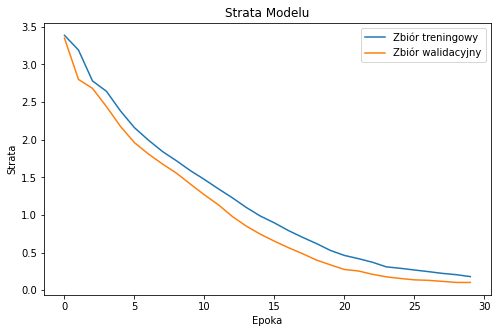

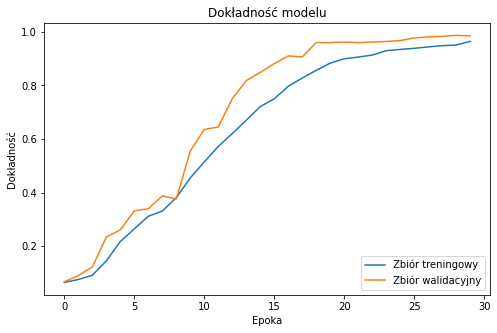

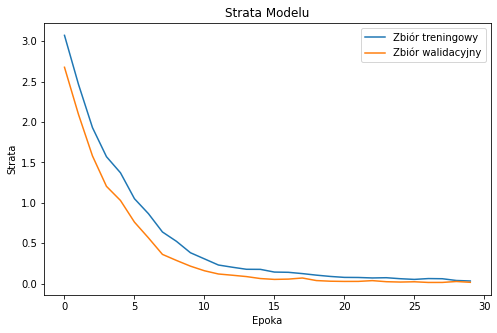

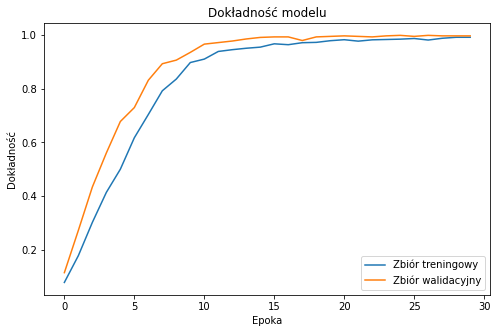

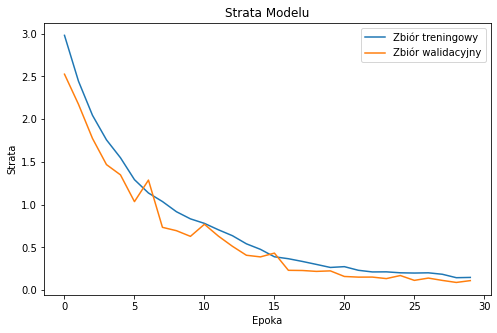

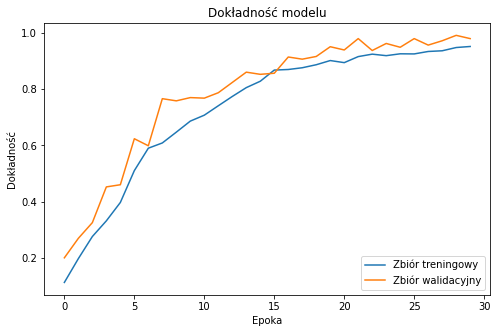

In [47]:
size1=8
size2=5
plt.figure(figsize=(size1, size2))
plt.plot(gru_history.history['loss'])
plt.plot(gru_history.history['val_loss'])
plt.title('Strata Modelu')
plt.ylabel('Strata')
plt.xlabel('Epoka')
plt.legend(['Zbiór treningowy', 'Zbiór walidacyjny'], loc='upper right')
plt.show()

plt.figure(figsize=(size1, size2))
plt.plot(gru_history.history['accuracy'])
plt.plot(gru_history.history['val_accuracy'])
plt.title('Dokładność modelu')
plt.ylabel('Dokładność')
plt.xlabel('Epoka')
plt.legend(['Zbiór treningowy', 'Zbiór walidacyjny'], loc='lower right')
plt.show()

plt.figure(figsize=(size1, size2))
plt.plot(lstm_history.history['loss'])
plt.plot(lstm_history.history['val_loss'])
plt.title('Strata Modelu')
plt.ylabel('Strata')
plt.xlabel('Epoka')
plt.legend(['Zbiór treningowy', 'Zbiór walidacyjny'], loc='upper right')
plt.show()

plt.figure(figsize=(size1, size2))
plt.plot(lstm_history.history['accuracy'])
plt.plot(lstm_history.history['val_accuracy'])
plt.title('Dokładność modelu')
plt.ylabel('Dokładność')
plt.xlabel('Epoka')
plt.legend(['Zbiór treningowy', 'Zbiór walidacyjny'], loc='lower right')
plt.show()

plt.figure(figsize=(size1, size2))
plt.plot(stacked_lstm_history.history['loss'])
plt.plot(stacked_lstm_history.history['val_loss'])
plt.title('Strata Modelu')
plt.ylabel('Strata')
plt.xlabel('Epoka')
plt.legend(['Zbiór treningowy', 'Zbiór walidacyjny'], loc='upper right')
plt.show()

plt.figure(figsize=(size1, size2))
plt.plot(stacked_lstm_history.history['accuracy'])
plt.plot(stacked_lstm_history.history['val_accuracy'])
plt.title('Dokładność modelu')
plt.ylabel('Dokładność')
plt.xlabel('Epoka')
plt.legend(['Zbiór treningowy', 'Zbiór walidacyjny'], loc='lower right')
plt.show()


In [2]:
early_gru=load_model("./Models/gru_classification.h5")
early_lstm=load_model("./Models/lstm_classification.h5")
early_stacked_lstm=load_model("./Models/stacked_lstm_classification.h5")

early_gru.evaluate(X_training,y_training)
early_gru.evaluate(X_val, y_val)
early_gru.evaluate(X_test,y_test)

early_lstm.evaluate(X_training, y_training)
early_lstm.evaluate(X_val, y_val)
early_lstm.evaluate(X_test,y_test)

early_stacked_lstm.evaluate(X_training, y_training)
early_stacked_lstm.evaluate(X_val, y_val)
early_stacked_lstm.evaluate(X_test,y_test)

17/17 [==============================] - 0s 4ms/step - loss: 0.0793 - accuracy: 0.9827


[0.07933367043733597, 0.982692301273346]

In [41]:
early_gru.summary()
early_lstm.summary()
early_stacked_lstm.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 20, 30)            8670      
                                                                 
 gru (GRU)                   (None, 30)                5580      
                                                                 
 dense (Dense)               (None, 31)                961       
                                                                 
Total params: 15,211
Trainable params: 15,211
Non-trainable params: 0
_________________________________________________________________
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 20, 30)            8670      
                                                                 
 lstm (LSTM)                 (No

Text(0.5, 1.0, 'Macierz błędów')

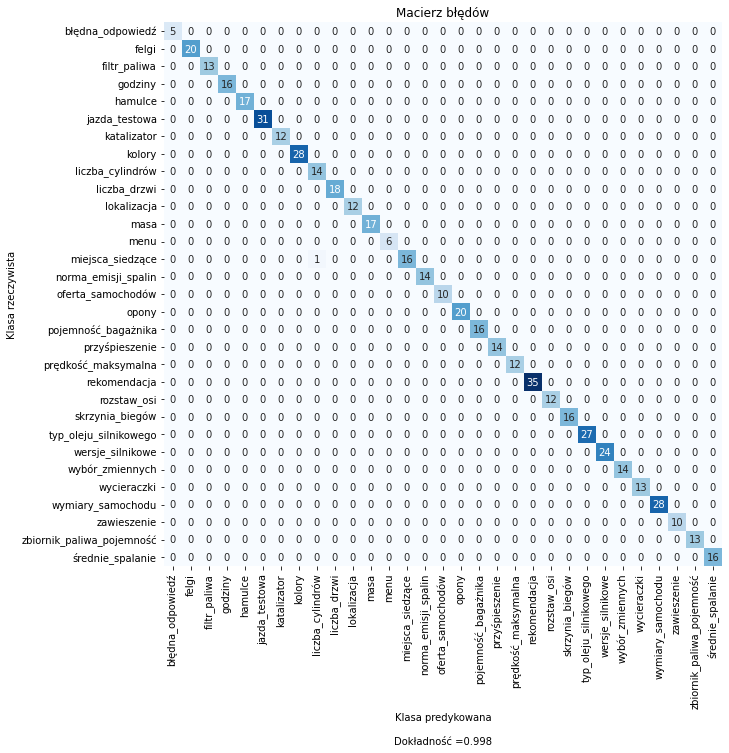

In [26]:
predictions=early_lstm.predict(X_test)
class_list=tokenizer.intent_tags_list
cm=confusion_matrix(
    np.asarray(y_test).argmax(axis=1), np.asarray(predictions).argmax(axis=1))

blanks = ['' for i in range(cm.size)]
group_counts = ["{0:0.0f}\n".format(value) for value in cm.flatten()]
box_labels = [f"{v1}".strip() for v1 in group_counts]
box_labels = np.asarray(box_labels).reshape(cm.shape[0],cm.shape[1])
accuracy  = np.trace(cm) / float(np.sum(cm))
stats_text = "\n\nDokładność ={:0.3f}".format(accuracy)
plt.figure(figsize=(10,10))
sns.heatmap(cm,annot=box_labels,fmt="",cmap='Blues',cbar=False,xticklabels=class_list,yticklabels=class_list)
plt.ylabel("Klasa rzeczywista")
plt.xlabel("Klasa predykowana" + stats_text)
plt.title("Macierz błędów")

In [27]:
print(classification_report(np.asarray(y_test).argmax(axis=1),np.asarray(predictions).argmax(axis=1),
target_names=class_list))

                           precision    recall  f1-score   support

         błędna_odpowiedź       1.00      1.00      1.00         5
                    felgi       1.00      1.00      1.00        20
             filtr_paliwa       1.00      1.00      1.00        13
                  godziny       1.00      1.00      1.00        16
                  hamulce       1.00      1.00      1.00        17
            jazda_testowa       1.00      1.00      1.00        31
              katalizator       1.00      1.00      1.00        12
                   kolory       1.00      1.00      1.00        28
         liczba_cylindrów       0.93      1.00      0.97        14
             liczba_drzwi       1.00      1.00      1.00        18
              lokalizacja       1.00      1.00      1.00        12
                     masa       1.00      1.00      1.00        17
                     menu       1.00      1.00      1.00         6
         miejsca_siedzące       1.00      0.94      0.97     

In [28]:
#NER
z_vector=tokenizer.tag_to_id(z)
X_training, X_validation, y_training, y_validation = train_test_split(x_vector, z_vector, test_size = 0.5, shuffle = True, random_state = 1)
X_test, X_val, y_test, y_val = train_test_split(X_validation, y_validation, test_size = 0.5, shuffle = True, random_state = 1)
ner = Sequential()
ner.add(Embedding(tokenizer.lemmatized_word_number, 30, input_length = 20)) 
ner.add(LSTM(units=30,return_sequences=True, dropout=0.5, recurrent_dropout=0.5))
ner.add(TimeDistributed(Dense(tokenizer.number_ner_tags, activation="softmax")))
clear_session()

filename = 'Models/ner_recognition.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(filename, monitor='val_loss', verbose=1, 
                             save_best_only=True, mode='min')
adam = Adam(learning_rate=0.003)
ner.compile(loss='sparse_categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
ner_history  = ner.fit(X_training,y_training, epochs =20, batch_size=8, verbose=1, validation_data=(X_val, y_val),
callbacks=[checkpoint])

Epoch 1/20
217/217 [==============================] - ETA: 0s - loss: 0.1394 - accuracy: 0.9759
Epoch 1: val_loss improved from inf to 0.01518, saving model to Models\ner_recognition.h5
217/217 [==============================] - 5s 14ms/step - loss: 0.1394 - accuracy: 0.9759 - val_loss: 0.0152 - val_accuracy: 0.9958
Epoch 2/20
214/217 [============================>.] - ETA: 0s - loss: 0.0113 - accuracy: 0.9967
Epoch 2: val_loss improved from 0.01518 to 0.00903, saving model to Models\ner_recognition.h5
217/217 [==============================] - 3s 13ms/step - loss: 0.0112 - accuracy: 0.9967 - val_loss: 0.0090 - val_accuracy: 0.9976
Epoch 3/20
214/217 [============================>.] - ETA: 0s - loss: 0.0075 - accuracy: 0.9983
Epoch 3: val_loss improved from 0.00903 to 0.00652, saving model to Models\ner_recognition.h5
217/217 [==============================] - 3s 13ms/step - loss: 0.0075 - accuracy: 0.9983 - val_loss: 0.0065 - val_accuracy: 0.9986
Epoch 4/20
214/217 [==================

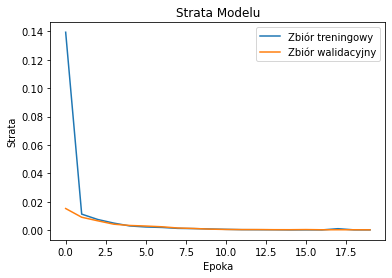

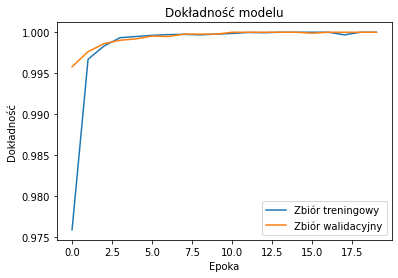

In [39]:
plt.plot(ner_history.history['loss'])
plt.plot(ner_history.history['val_loss'])
plt.title('Strata Modelu')
plt.ylabel('Strata')
plt.xlabel('Epoka')
plt.legend(['Zbiór treningowy', 'Zbiór walidacyjny'], loc='upper right')
plt.show()

plt.plot(ner_history.history['accuracy'])
plt.plot(ner_history.history['val_accuracy'])
plt.title('Dokładność modelu')
plt.ylabel('Dokładność')
plt.xlabel('Epoka')
plt.legend(['Zbiór treningowy', 'Zbiór walidacyjny'], loc='lower right')
plt.show()

In [30]:
early_ner=load_model("./Models/ner_recognition.h5")
early_ner.evaluate(X_val, y_val)
early_ner.evaluate(X_test,y_test)

28/28 [==============================] - 0s 3ms/step - loss: 9.5534e-05 - accuracy: 1.0000


[9.553390555083752e-05, 1.0]

In [31]:
import pickle
with open('./Models/Preprocessing', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

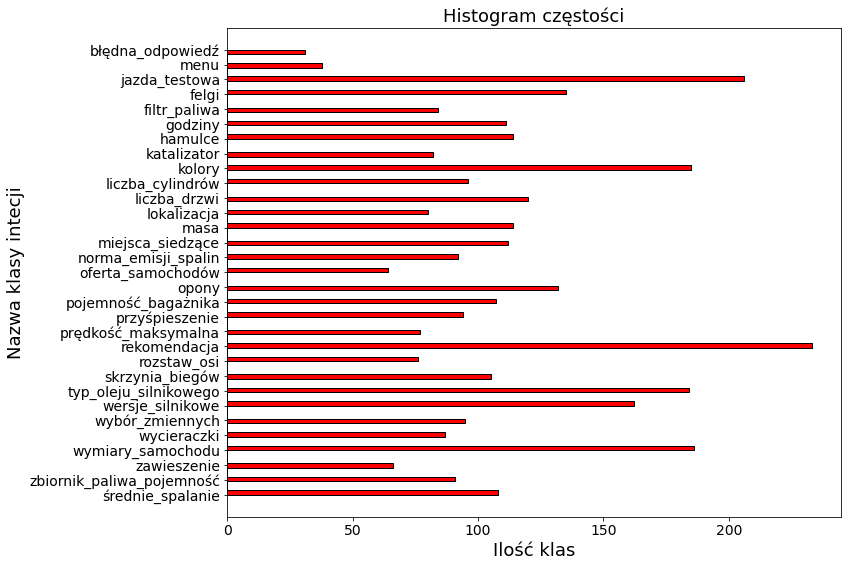

In [36]:
df = read_csv('./Dataset/intents.csv')
tags=df[['TAG']]
plt.figure(figsize=(11,9))
plt.hist(tags, bins = 100,color = 'red', ec = 'black',orientation='horizontal')
# Labels
plt.ylabel('Nazwa klasy intecji',fontsize=18)
plt.xlabel('Ilość klas',fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
# Add Title
plt.title('Histogram częstości',fontsize=18);